In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import calendar
import warnings
warnings.filterwarnings("ignore")
#import pycountry_convert as pc
#import pycountry as pctry
import yfinance as yf
%matplotlib inline

import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact

import plotly.graph_objects as go

ModuleNotFoundError: No module named 'yfinance'

In [2]:
##** Read the data first time and save it to a file.**
import yfinance as yf
tickersY = yf.Tickers('VTSAX IYZ XLB XLY XLP XLE IYF XLV XLI XLK IYR XLU IBB ITA SOXX ITB')
df_hist=tickersY.history(start='2000-01-01', end='2020-06-04')
sector_df=df_hist['Close']
sector_df.columns=(['Total Stock Market','Communications', 'Materials', 'Consumer Discretionary', 'Consumer Staples',
                   'Energy', 'Financials', 'Health Care', 'Industrial', 'Technology', 'Real Estate',
                   'Utilities', 'BioTech', 'Defense', 'Semiconductor', 'Home Construction'])
#sector_df.to_csv("yfinance_sector_data.csv")

[*********************100%***********************]  16 of 16 completed


# Std dev - all sectors 

In [3]:
#sector_df=pd.read_csv("yfinance_sector_data.csv",  infer_datetime_format=True)

In [4]:
#sector_df.set_index("Date",inplace=True)

sector_df.head(3)

Total Stock Market  Communications  Materials  \
Date                                                        
2000-01-03                 NaN             NaN        NaN   
2000-01-04                 NaN             NaN        NaN   
2000-01-05                 NaN             NaN        NaN   

            Consumer Discretionary  Consumer Staples  Energy  Financials  \
Date                                                                       
2000-01-03                     NaN               NaN     NaN         NaN   
2000-01-04                     NaN               NaN     NaN         NaN   
2000-01-05                     NaN               NaN     NaN         NaN   

            Health Care  Industrial  Technology  Real Estate  Utilities  \
Date                                                                      
2000-01-03          NaN   16.283916   16.885973    19.811380  43.262833   
2000-01-04          NaN   16.127146   16.568123    19.264048  41.067986   
2000-01-05          NaN   16.793398   17.005169    19.178183  40.458302   

              BioTech    Defense  Semiconductor  Home Construction  
Date                                                                
2000-01-03  14.231282  13.261072      22.506960          23.411850  
2000-01-04  13.830540  12.861057      21.996243          22.707548  
2000-01-05  14.074896  13.185598      21.798914          22.428253

In [5]:
sector_df_stddev=sector_df.pct_change()
sector_df_stddev.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-26',
               '2020-05-27', '2020-05-28', '2020-05-29', '2020-06-01',
               '2020-06-02', '2020-06-03'],
              dtype='datetime64[ns]', name='Date', length=5137, freq=None)

In [6]:
#calculate std dev yearly
std_dev_yearly= sector_df_stddev.rolling(window=30).std().groupby(sector_df_stddev.index.year).mean()
std_dev_yearly.head(3)

Total Stock Market  Communications  Materials  Consumer Discretionary  \
Date                                                                          
2000                 NaN             NaN        NaN                0.015983   
2001            0.027720             NaN        NaN                0.014445   
2002            0.027284             NaN        NaN                0.017121   

      Consumer Staples    Energy  Financials  Health Care  Industrial  \
Date                                                                    
2000          0.006987  0.017680         NaN     0.017946    0.018934   
2001          0.007472  0.018082    0.037792     0.013953    0.017292   
2002          0.008588  0.024141    0.037163     0.014908    0.017343   

      Technology  Real Estate  Utilities   BioTech   Defense  Semiconductor  \
Date                                                                          
2000    0.017711     0.014967   0.025875  0.015036  0.014087       0.015104   
2001    0.016399     0.016317   0.029569  0.011789  0.012283       0.015232   
2002    0.017365     0.017294   0.025997  0.011878  0.018297       0.015152   

      Home Construction  
Date                     
2000           0.019822  
2001           0.018274  
2002           0.017318

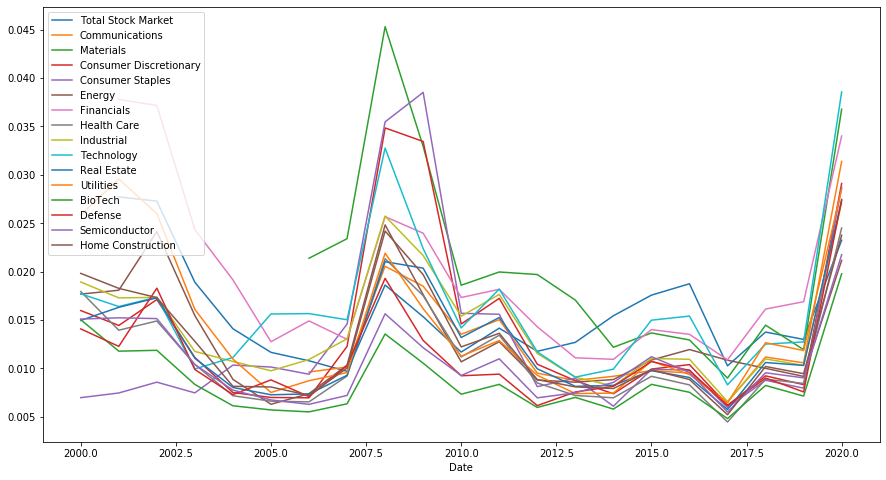

In [7]:
std_dev_yearly.plot(figsize=(15,8))

# Std dev - sectors categorised into Defensive/Aggressive amd Total market

In [8]:
# slice the dataframes
df_Total_Stock_Market=std_dev_yearly[['Total Stock Market']]
df_cat_defensive=std_dev_yearly[['Health Care','Consumer Staples','Utilities','Defense','Home Construction']]
df_cat_aggressive=std_dev_yearly[['Communications','Materials','Financials','Technology','BioTech','Semiconductor','Materials','Energy','Industrial']]

# calculate average of defensive and aggressive for plotting and add it as new column
df_cat_defensive['average'] = df_cat_defensive.mean(numeric_only=True, axis=1)
df_cat_aggressive['average'] = df_cat_aggressive.mean(numeric_only=True, axis=1)

C:\Users\JATIN\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\JATIN\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
df_Total_Stock_Market.head(2)

Total Stock Market
Date                    
2000                 NaN
2001             0.02772

In [10]:
df_cat_defensive.head(2)

Health Care  Consumer Staples  Utilities   Defense  Home Construction  \
Date                                                                          
2000     0.017946          0.006987   0.025875  0.014087           0.019822   
2001     0.013953          0.007472   0.029569  0.012283           0.018274   

       average  
Date            
2000  0.016943  
2001  0.016310

In [11]:
df_cat_aggressive.head(2)

Communications  Materials  Financials  Technology   BioTech  \
Date                                                                
2000             NaN        NaN         NaN    0.017711  0.015036   
2001             NaN        NaN    0.037792    0.016399  0.011789   

      Semiconductor  Materials    Energy  Industrial   average  
Date                                                            
2000       0.015104        NaN  0.017680    0.018934  0.016893  
2001       0.015232        NaN  0.018082    0.017292  0.019431

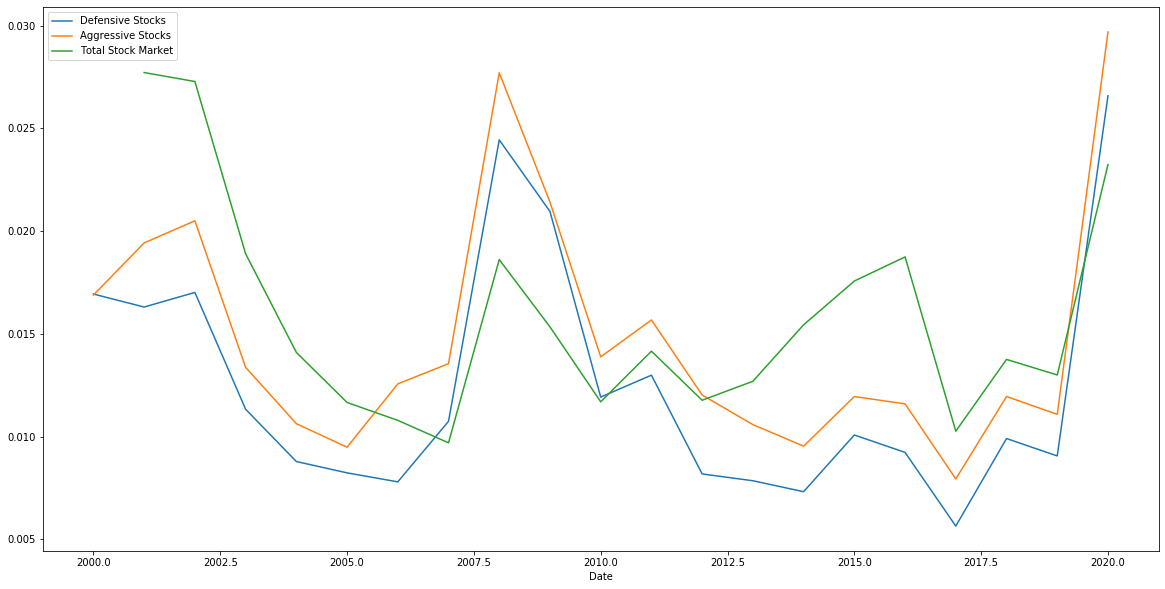

In [12]:
# *** Plot the graph

# Set figure for defensive stocks
ax = df_cat_defensive[['average']].plot(figsize=(20,10))

# Overlay aggressive stocks
df_cat_aggressive[['average']].plot(ax=ax)
df_Total_Stock_Market.plot(ax=ax)
# Set the legend of the figure
ax.legend(["Defensive Stocks", "Aggressive Stocks","Total Stock Market"]);

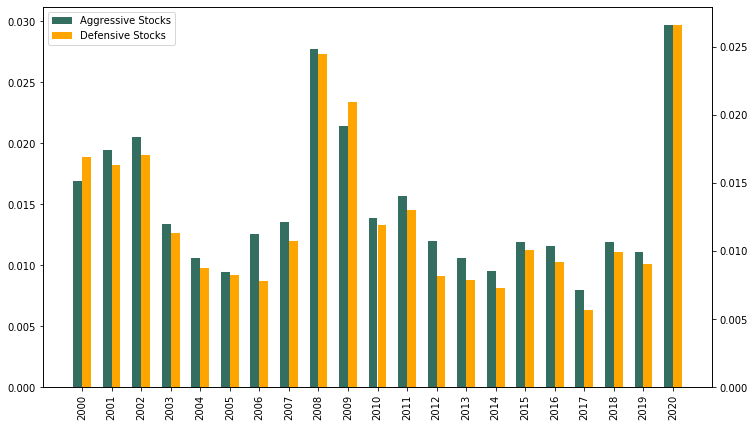

In [13]:
# *** plot bar chart for defensive and aggressive

#ax1 = plt.subplot(1,1,1)
f, ax1 = plt.subplots(figsize=(12,7))
w = 0.3
#plt.xticks(), will label the bars on x axis with the respective country names.

plt.xticks(df_cat_aggressive.index+w/2, df_cat_aggressive.index, rotation='vertical')
aggr =ax1.bar(df_cat_aggressive.index, df_cat_aggressive['average'], width=w, color="#346e60", align='center', )
#The trick is to use two different axes that share the same x axis, we have used ax1.twinx() method.
ax2 = ax1.twinx()
#We have calculated GDP by dividing gdpPerCapita to population.
defs =ax2.bar(df_cat_defensive.index+w, df_cat_defensive['average'], width=w,color="orange",align='center',)
#Set the Y axis label as GDP.
#plt.ylabel('Aggressive')
#To set the legend on the plot we have used plt.legend()
plt.legend([aggr, defs],['Aggressive Stocks', 'Defensive Stocks'])
#To show the plot finally we have used plt.show().

plt.show()


In [14]:
df_cat_joined=pd.concat([df_cat_aggressive[['average']],df_cat_defensive[['average']]], axis='columns', join='inner')
df_cat_joined.head(2)

average   average
Date                    
2000  0.016893  0.016943
2001  0.019431  0.016310

In [15]:
df_cat_joined.columns=['Avg. Aggressive','Avg. Defensive']
df_cat_joined.head(2)

Avg. Aggressive  Avg. Defensive
Date                                 
2000         0.016893        0.016943
2001         0.019431        0.016310

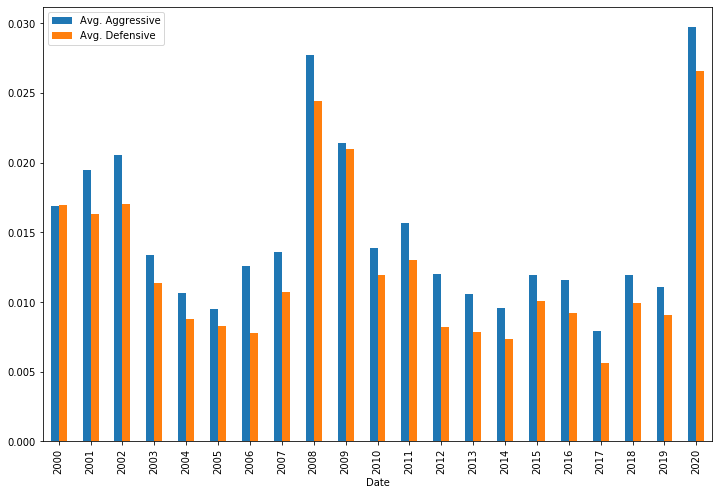

In [16]:
df_cat_joined.plot.bar(figsize=(12,8))

## calculating scaled value outside pyhton.. will write a function in python later in the notebook.
### need it to plot disaster and jumps data on the same chart

In [17]:
dfjumps_by_year = pd.read_csv("./data/jumps_by_year.csv")
dfjumps_by_year.head(2)

Date  Total Stock Market  Communications  Materials  \
0  2000                   0               0          0   
1  2001                  78               0          0   

   Consumer Discretionary  Consumer Staples  Energy  Financials  Health Care  \
0                      20                 0      24           0            5   
1                      24                 2      32          60           12   

   Industrial  Technology  Real Estate  Utilities  BioTech  Defense  \
0          45          43           24         87       22       25   
1          32          28           20         79       12       10   

   Semiconductor  Home Construction  Unnamed: 17  ScaledVal  
0             26                 44          NaN   0.000000  
1             21                 32          NaN   0.025161

In [18]:
dfjumps_by_year=dfjumps_by_year[['Date','ScaledVal']]
dfjumps_by_year.set_index('Date', inplace=True)
dfjumps_by_year.head(3)

ScaledVal
Date           
2000   0.000000
2001   0.025161
2002   0.030000

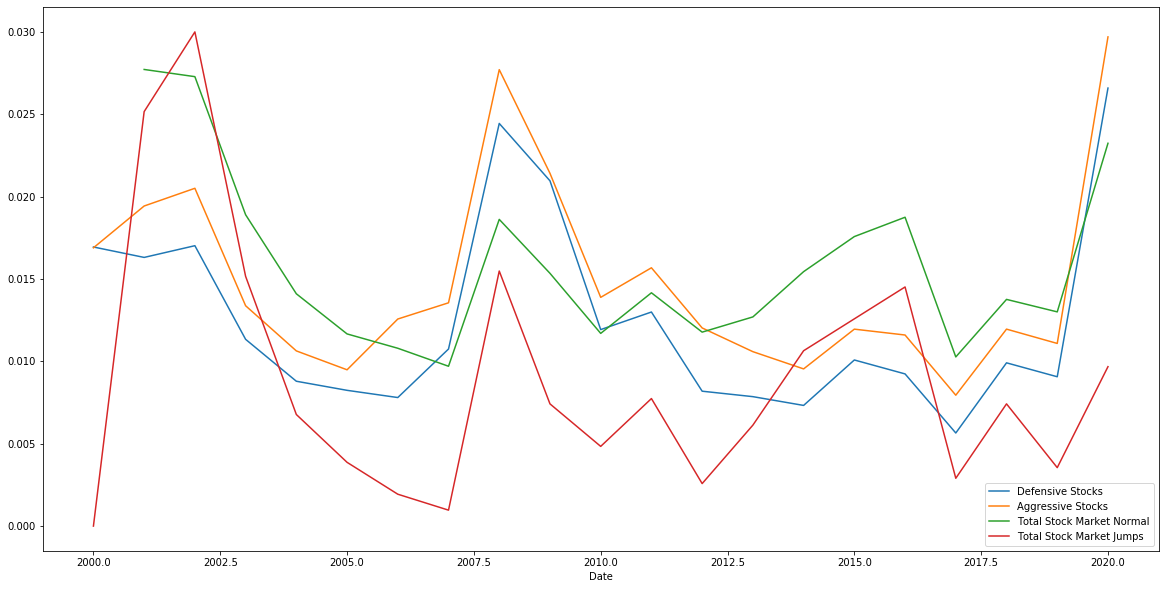

In [19]:
ax = df_cat_defensive[['average']].plot(figsize=(20,10))

# Overlay aggressive stocks
df_cat_aggressive[['average']].plot(ax=ax)
df_Total_Stock_Market.plot(ax=ax)
dfjumps_by_year.plot(ax=ax)
# Set the legend of the figure
ax.legend(["Defensive Stocks", "Aggressive Stocks","Total Stock Market Normal","Total Stock Market Jumps"]);

In [20]:
def scaler(seq, rng):
    ba=rng[1]-rng[0]
    s2=[]
    for x in seq:
        mini=min(seq)
        maxi=max(seq)
        y=ba*((x-mini)/(maxi-mini))
        s2.append(y)
    return pd.DataFrame(s2, seq.index )

In [21]:
df_usa_deaths_affected = pd.read_csv("./data/P1_df_usa_deaths_affected.csv")
df_usa_deaths_affected.columns=['Date', 'Total Deaths', 'No Affected']

In [22]:
df_usa_deaths_affected.set_index("Date", inplace=True)
df_usa_deaths_affected.head(3)

Total Deaths  No Affected
Date                           
2000           162        81264
2001           153       128833
2002           444       171053

In [23]:
df_usa_deaths_affected['Scaled Deaths']=scaler(df_usa_deaths_affected['Total Deaths'], [0,.03])
df_usa_deaths_affected['Scaled Affected']=scaler(df_usa_deaths_affected['No Affected'], [0,.03])

In [24]:
df_usa_deaths_affected.head(2)

Total Deaths  No Affected  Scaled Deaths  Scaled Affected
Date                                                           
2000           162        81264       0.001375         0.000025
2001           153       128833       0.001233         0.000042

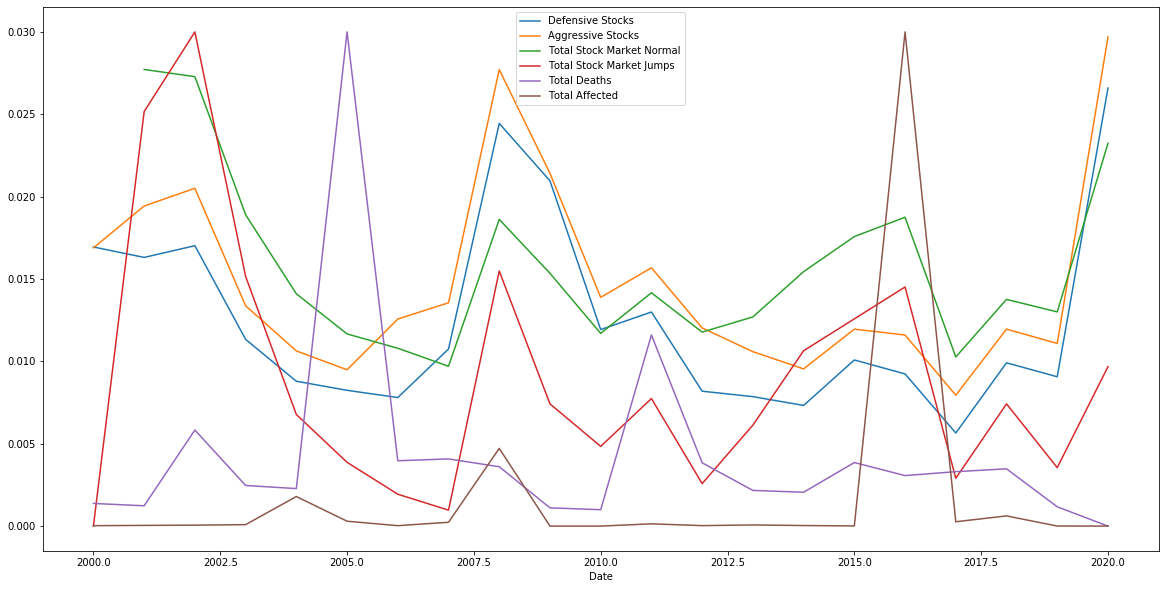

In [25]:
ax = df_cat_defensive[['average']].plot(figsize=(20,10))

# Overlay aggressive stocks
df_cat_aggressive[['average']].plot(ax=ax)
df_Total_Stock_Market.plot(ax=ax)
dfjumps_by_year.plot(ax=ax)
df_usa_deaths_affected['Scaled Deaths'].plot(ax=ax)
df_usa_deaths_affected['Scaled Affected'].plot(ax=ax)
# Set the legend of the figure
ax.legend(["Defensive Stocks", "Aggressive Stocks","Total Stock Market Normal","Total Stock Market Jumps","Total Deaths","Total Affected"]);

## Plot parallel coordinates chart

In [26]:
df_disasters_unscaled = pd.read_csv('./data/df_disasters_unscaled.csv')
df_jumps_and_std_dev = pd.read_csv('./data/jumps_and_std_dev.csv')
df_jumps_and_std_dev.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
df_jumps_and_std_dev["Date"]=df_jumps_and_std_dev["Date"] +2000
df_jumps_and_std_dev.set_index("Date", inplace=True)
df_jumps_and_std_dev.head(3)

Average Std Dev  Total Stock Market
Date                                     
2000         0.261497                 0.0
2001         0.251723                78.0
2002         0.262706                93.0

In [27]:
df_disasters_unscaled.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
df_disasters_unscaled["Date"]=df_disasters_unscaled["Date"] +2000
df_disasters_unscaled.set_index("Date", inplace=True)
df_disasters_unscaled.head(3)

Number of Disasters  Total Deaths  No Affected
Date                                                
2000                   31         162.0      81264.0
2001                   27         153.0     128833.0
2002                   32         444.0     171053.0

In [28]:
combined_df=pd.concat([df_disasters_unscaled, df_jumps_and_std_dev], axis=1)
combined_df.head(4)

Number of Disasters  Total Deaths  No Affected  Average Std Dev  \
Date                                                                    
2000                   31         162.0      81264.0         0.261497   
2001                   27         153.0     128833.0         0.251723   
2002                   32         444.0     171053.0         0.262706   
2003                   23         231.0     258195.0         0.174980   

      Total Stock Market  
Date                      
2000                 0.0  
2001                78.0  
2002                93.0  
2003                47.0

In [29]:
combined_df['Average Std Dev']=round(combined_df['Average Std Dev']*100,2)
combined_df=combined_df.sort_values("Date", ascending=True)
figi=px.parallel_categories(combined_df, height=800, color=combined_df.index)
figi.show()

## Plot pie chart for all stock returns

In [30]:
df_total_rets_year=pd.read_csv("./data/total_rets_year.csv",index_col="Date",  infer_datetime_format=True)
df_total_rets_year.head(3)

Total Stock Market  Communications  Materials  Consumer Discretionary  \
Date                                                                          
2000             1.00000             1.0        1.0                0.977274   
2001             0.87971             1.0        1.0                0.934739   
2002             0.54201             1.0        1.0                0.861397   

      Consumer Staples    Energy  Financials  Health Care  Industrial  \
Date                                                                    
2000          1.122664  0.706362    1.000000     0.974251    0.857417   
2001          1.083282  0.817570    0.915347     0.891005    1.021406   
2002          1.034476  0.614128    0.521504     0.790396    0.946715   

      Technology  Real Estate  Utilities   BioTech   Defense  Semiconductor  \
Date                                                                          
2000    1.268888     1.095412   0.564825  1.270944  1.255466       0.899595   
2001    0.818670     0.894593   0.766467  0.900729  0.869948       0.991741   
2002    0.853184     0.754270   0.618331  0.799059  0.712245       0.992611   

      Home Construction  
Date                     
2000           0.857128  
2001           1.127301  
2002           0.813400

In [31]:
df_total_rets_year.describe()

Total Stock Market  Communications  Materials  Consumer Discretionary  \
count           21.000000       21.000000  21.000000               21.000000   
mean             1.094467        1.086835   1.046271                1.053442   
std              0.240747        0.202902   0.310260                0.208671   
min              0.542010        0.613545   0.421142                0.497123   
25%              1.000000        1.000000   1.000000                0.906102   
50%              1.101329        1.041388   1.000000                1.122209   
75%              1.210759        1.202495   1.104213                1.187410   
max              1.655403        1.569625   1.793436                1.339833   

       Consumer Staples     Energy  Financials  Health Care  Industrial  \
count         21.000000  21.000000   21.000000    21.000000   21.000000   
mean           1.102467   1.017240    1.125444     1.079869    1.083924   
std            0.189547   0.214322    0.348370     0.178469    0.208386   
min            0.601222   0.579761    0.482902     0.630139    0.559511   
25%            1.016165   0.914103    0.935115     0.974251    0.946715   
50%            1.089514   1.006803    1.052198     1.125545    1.134925   
75%            1.266911   1.186573    1.383441     1.172510    1.220855   
max            1.353495   1.325713    1.809530     1.335152    1.481580   

       Technology  Real Estate  Utilities    BioTech    Defense  \
count   21.000000    21.000000  21.000000  21.000000  21.000000   
mean     1.071136     1.082596   1.077117   1.078860   1.090156   
std      0.236058     0.199534   0.267384   0.131195   0.169698   
min      0.610447     0.612724   0.564825   0.799059   0.710898   
25%      0.853184     0.956766   0.996835   1.028419   1.010370   
50%      1.117415     1.134932   1.113946   1.111733   1.130657   
75%      1.262464     1.220312   1.178424   1.142777   1.208927   
max      1.401788     1.405487   1.513250   1.274340   1.287472   

       Semiconductor  Home Construction  
count      21.000000          21.000000  
mean        1.083152           1.103221  
std         0.136767           0.200806  
min         0.766900           0.670288  
25%         1.009983           1.015820  
50%         1.068311           1.099028  
75%         1.173719           1.235990  
max         1.414092           1.427326

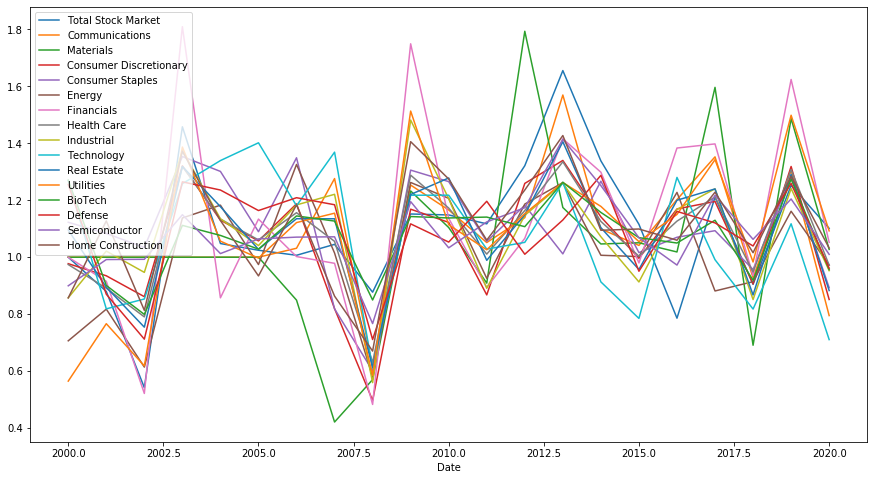

In [32]:
df_total_rets_year.plot(figsize=(15,8))

In [33]:
hvplot.plot(df_total_rets_year, kind="line", width=1000, height=600)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [34]:
df_total_rets_year_averages=df_total_rets_year.describe().loc[["mean"]]
df_total_rets_year_averages=df_total_rets_year_averages.T

In [35]:
df_total_rets_year_averages

mean
Total Stock Market      1.094467
Communications          1.086835
Materials               1.046271
Consumer Discretionary  1.053442
Consumer Staples        1.102467
Energy                  1.017240
Financials              1.125444
Health Care             1.079869
Industrial              1.083924
Technology              1.071136
Real Estate             1.082596
Utilities               1.077117
BioTech                 1.078860
Defense                 1.090156
Semiconductor           1.083152
Home Construction       1.103221

In [36]:
fig = px.bar(df_total_rets_year_averages, x=df_total_rets_year_averages.index, y='mean',
             color=df_total_rets_year_averages.index,
            
             labels={'mean':'Average Return', 'index':'Stocks'}, height=600, title="Average Stock returns from 2000 to 2020" )
fig.show()

In [37]:
df_total_rets_year_averages["mean"] = df_total_rets_year_averages["mean"]-1

In [38]:
fig = px.bar(df_total_rets_year_averages, x=df_total_rets_year_averages.index, y='mean',
             color=df_total_rets_year_averages.index,
            
             labels={'mean':'Average Return', 'index':'Stocks'}, height=600, title="Average Stock returns from 2000 to 2020" )
fig.show()

# Plot disaster data

In [39]:
df_year_all_joined =  pd.read_csv('./data/year_all_joined.csv')
df_month_all_joined =  pd.read_csv('./data/month_all_joined.csv')

In [40]:
df_year_all_joined.columns=['Year', 'Total Stock Market', 'Communications', 'Materials',
       'Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials',
       'Health Care', 'Industrial', 'Technology', 'Real Estate', 'Utilities',
       'BioTech', 'Defense', 'Semiconductor', 'Home Construction',
       'Number of Disasters', 'Total Deaths', 'No Affected']
df_year_all_joined.set_index("Year", inplace=True)
df_year_all_joined.head(2)

Total Stock Market  Communications  Materials  Consumer Discretionary  \
Year                                                                          
2000                 0.0             0.0        0.0                    20.0   
2001                78.0             0.0        0.0                    24.0   

      Consumer Staples  Energy  Financials  Health Care  Industrial  \
Year                                                                  
2000               0.0    24.0         0.0          5.0        45.0   
2001               2.0    32.0        60.0         12.0        32.0   

      Technology  Real Estate  Utilities  BioTech  Defense  Semiconductor  \
Year                                                                        
2000        43.0         24.0       87.0     22.0     25.0           26.0   
2001        28.0         20.0       79.0     12.0     10.0           21.0   

      Home Construction  Number of Disasters  Total Deaths  No Affected  
Year                                                                     
2000               44.0                   31         162.0      81264.0  
2001               32.0                   27         153.0     128833.0

In [41]:
df_month_all_joined.columns=['Year', 'Month', 'Total Stock Market', 'Communications',
       'Materials', 'Consumer Discretionary', 'Consumer Staples', 'Energy',
       'Financials', 'Health Care', 'Industrial', 'Technology', 'Real Estate',
       'Utilities', 'BioTech', 'Defense', 'Semiconductor', 'Home Construction',
       'Number of Disasters', 'Total Deaths', 'No Affected']

In [42]:
df_month_all_joined.set_index(["Year","Month"], inplace=True)

In [43]:
def plot_deaths():
    deaths= df_year_all_joined[["Total Deaths"]]
    std_y=deaths["Total Deaths"].std()
    min_y=deaths["Total Deaths"].min()-std_y
    max_y=deaths["Total Deaths"].max()+std_y
    ax = deaths["Total Deaths"].plot(kind="bar", title='Deaths-Natural disasters in USA (2000 - 2020)',color="#bf6270",figsize=(7,5))
    ax.set_xlabel("Year")
    ax.set_ylabel("No of deaths")
    plt.ylim(min_y,max_y)
    plt.show()
    return ax

def plot_affected():
    affected= df_year_all_joined[["No Affected"]]
    std_y=affected["No Affected"].std()
    min_y=affected["No Affected"].min()-std_y
    max_y=affected["No Affected"].max()+std_y
    ax = affected["No Affected"].plot(kind="bar", title='Affected-Natural disasters in USA (2000 - 2020)',color="orange",figsize=(7,5))
    ax.set_xlabel("Year")
    ax.set_ylabel("No of affected people")
    plt.ylim(min_y,max_y)
    plt.show()
    return ax

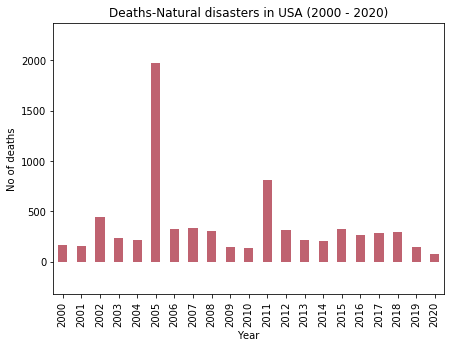

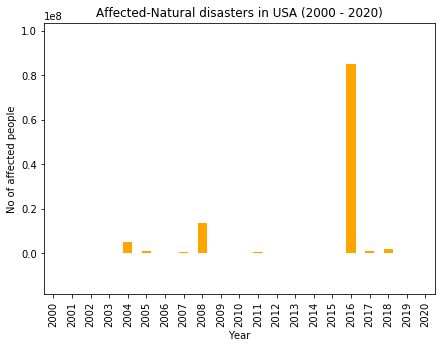

In [44]:
plot_deaths()
plot_affected()  

In [45]:
df_year_all_joined =  pd.read_csv('./data/year_all_joined.csv')
df_year_all_joined.columns=['Year', 'Total Stock Market', 'Communications', 'Materials',
       'Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials',
       'Health Care', 'Industrial', 'Technology', 'Real Estate', 'Utilities',
       'BioTech', 'Defense', 'Semiconductor', 'Home Construction',
       'Number of Disasters', 'Total Deaths', 'No Affected']
df_year_all_joined.set_index("Year", inplace=True)
df_year_all_joined.head(2)

Total Stock Market  Communications  Materials  Consumer Discretionary  \
Year                                                                          
2000                 0.0             0.0        0.0                    20.0   
2001                78.0             0.0        0.0                    24.0   

      Consumer Staples  Energy  Financials  Health Care  Industrial  \
Year                                                                  
2000               0.0    24.0         0.0          5.0        45.0   
2001               2.0    32.0        60.0         12.0        32.0   

      Technology  Real Estate  Utilities  BioTech  Defense  Semiconductor  \
Year                                                                        
2000        43.0         24.0       87.0     22.0     25.0           26.0   
2001        28.0         20.0       79.0     12.0     10.0           21.0   

      Home Construction  Number of Disasters  Total Deaths  No Affected  
Year                                                                     
2000               44.0                   31         162.0      81264.0  
2001               32.0                   27         153.0     128833.0

In [46]:
df_sector_jumps_totals_sliced= df_year_all_joined[['Total Stock Market', 'Communications', 'Materials',
       'Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials',
       'Health Care', 'Industrial', 'Technology', 'Real Estate', 'Utilities',
       'BioTech', 'Defense', 'Semiconductor', 'Home Construction']]
df_sector_jumps_totals_sliced.head(4)

Total Stock Market  Communications  Materials  Consumer Discretionary  \
Year                                                                          
2000                 0.0             0.0        0.0                    20.0   
2001                78.0             0.0        0.0                    24.0   
2002                93.0             0.0        0.0                    36.0   
2003                47.0             0.0        0.0                    12.0   

      Consumer Staples  Energy  Financials  Health Care  Industrial  \
Year                                                                  
2000               0.0    24.0         0.0          5.0        45.0   
2001               2.0    32.0        60.0         12.0        32.0   
2002               6.0    76.0       120.0         25.0        38.0   
2003               0.0    24.0        70.0          6.0         8.0   

      Technology  Real Estate  Utilities  BioTech  Defense  Semiconductor  \
Year                                                                        
2000        43.0         24.0       87.0     22.0     25.0           26.0   
2001        28.0         20.0       79.0     12.0     10.0           21.0   
2002        35.0         38.0       90.0     11.0     37.0           30.0   
2003         6.0         10.0       26.0      4.0      6.0            7.0   

      Home Construction  
Year                     
2000               44.0  
2001               32.0  
2002               37.0  
2003               16.0

In [47]:
df_sector_jumps_totals_sliced.reset_index(inplace=True)

In [48]:
#df_sector_jumps_totals
cols=range(len(df_sector_jumps_totals_sliced.columns))
rows=range(len(df_sector_jumps_totals_sliced.index))
data_list=[]
count=0
for i in rows:
    row=int(i)
    year= int(df_sector_jumps_totals_sliced.loc[row][0])
    sectors=[]
    jumps=[]
    for j in cols:
        col=int(j)
        sector=df_sector_jumps_totals_sliced.columns[col]
        jumpcount=int(df_sector_jumps_totals_sliced.loc[row][col])
        if col !=0:
            # prepare list of values to be entered as columns to df
            sectors.append(sector)
            jumps.append(jumpcount)
            data_list.append([year,sector,jumpcount])

In [49]:
df_sector_jumps_totals=pd.DataFrame(data_list)

In [50]:
df_sector_jumps_totals.columns=["year","sector","jumpcount"]
df_sector_jumps_totals.head(5)

year                  sector  jumpcount
0  2000      Total Stock Market          0
1  2000          Communications          0
2  2000               Materials          0
3  2000  Consumer Discretionary         20
4  2000        Consumer Staples          0

In [51]:
fig = px.scatter(df_sector_jumps_totals, x="year", y="jumpcount", size="jumpcount", color="sector",hover_name="sector", log_x=True, size_max=60)
fig.show()

In [52]:
df_sector_jumps_totals_Communications= df_sector_jumps_totals[df_sector_jumps_totals.sector=='Communications']


fig = px.scatter(df_sector_jumps_totals_Communications, x="year", y="jumpcount", size="jumpcount", color="sector",hover_name="sector", log_x=True, size_max=60)
fig.show()

In [53]:
def plot_sector_jumps_totals_by_sector(sector):
    df_sector_jumps_totals_sector= df_sector_jumps_totals[df_sector_jumps_totals.sector==sector]
    fig = px.scatter(df_sector_jumps_totals_sector, x="year", y="jumpcount", size="jumpcount", color="sector",hover_name="sector", log_x=True, size_max=60)
    return fig

In [54]:
ax=plot_sector_jumps_totals_by_sector("BioTech")
ax.show()

In [55]:
interact(plot_sector_jumps_totals_by_sector, sector=df_sector_jumps_totals["sector"])


pn.extension('plotly')



Column
    [0] Column
        [0] Select(name='sector', options=['Total Stock Market', ...], value='Total Stock Market')
    [1] Row
        [0] Plotly(Figure, name='interactive04274')

## GDP and Cap data

In [56]:
df_gdp_cap_yearly=pd.read_csv("./data/P1_usa_gdp_cap_data.csv",  infer_datetime_format=True)

In [57]:
df_gdp_cap_yearly.rename(columns={"Unnamed: 0":"year"}, inplace=True)
df_gdp_cap_yearly.set_index("year", inplace=True)                       


In [58]:
df_gdp_cap_yearly.head(2)

cap           gdp
year                           
2000  36334.90878  1.025230e+13
2001  37133.24281  1.058180e+13

In [59]:
df_gdp_cap_yearly.describe()

cap           gdp
count     20.000000  2.000000e+01
mean   49370.475802  1.526008e+13
std     8502.053162  3.319819e+12
min    36334.908780  1.025230e+13
25%    43514.261102  1.283088e+13
50%    48425.037115  1.485245e+13
75%    55491.423875  1.769610e+13
max    65112.000000  2.130000e+13

In [60]:
df_gdp_cap_yearly['Scaled gdp']=scaler(df_gdp_cap_yearly['gdp'], [36334.908780,65112.000])

In [61]:
df_gdp_cap_yearly.head(3)

cap           gdp   Scaled gdp
year                                        
2000  36334.90878  1.025230e+13     0.000000
2001  37133.24281  1.058180e+13   858.282860
2002  38023.16111  1.093640e+13  1781.946297

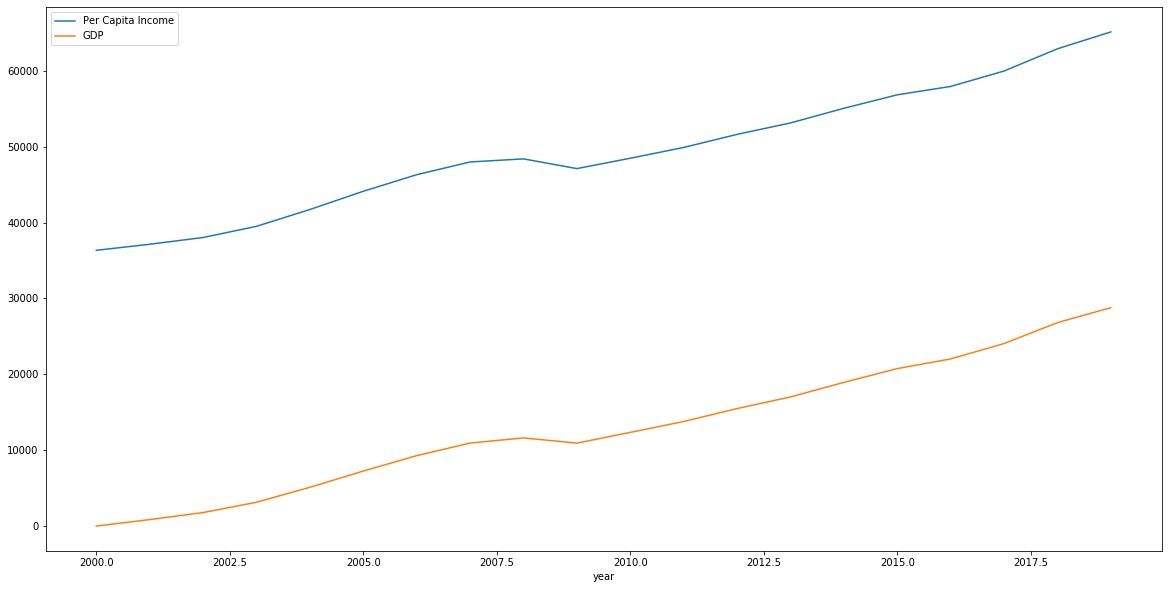

In [62]:
ax = df_gdp_cap_yearly[['cap']].plot(figsize=(20,10))

# Overlay aggressive stocks
df_gdp_cap_yearly[['Scaled gdp']].plot(ax=ax)

# Set the legend of the figure
ax.legend(["Per Capita Income", "GDP"]);

## Additional graphs


In [63]:
df_year=pd.read_csv("./data/df_year_scaled.csv",  infer_datetime_format=True)
df_year.set_index("Year",inplace=True)
df_year.head(2)

Total Stock Market  Communications  Materials  Consumer Discretionary  \
Year                                                                          
2000                 0.0             0.0        0.0                    20.0   
2001                78.0             0.0        0.0                    24.0   

      Consumer Staples  Energy  Financials  Health Care  Industrial  \
Year                                                                  
2000               0.0    24.0         0.0          5.0        45.0   
2001               2.0    32.0        60.0         12.0        32.0   

      Technology  ...  BioTech  Defense  Semiconductor  Home Construction  \
Year              ...                                                       
2000        43.0  ...     22.0     25.0           26.0               44.0   
2001        28.0  ...     12.0     10.0           21.0               32.0   

      Number of Disasters  Total Deaths  No Affected  Scaled Disasters  \
Year                                                                     
2000                   31         162.0      81264.0          0.028966   
2001                   27         153.0     128833.0          0.024828   

      Scaled Deaths  Scaled Affected  
Year                                  
2000       0.001375         0.000025  
2001       0.001233         0.000042  

[2 rows x 22 columns]

In [64]:

# hline_def=df_year['Scaled Affected'].rolling(2).cov(df_cat_defensive['Scaled Average'])
# hline_def_scaled=scaler(hline_def, [0,.03])
# hline_agg=df_year['Scaled Affected'].rolling(2).cov(df_cat_aggressive['Scaled Average'])
# hline_agg_scaled=scaler(hline_agg, [0,.03])
# hline_rets=df_year['Scaled Affected'].rolling(2).cov(df_total_rets_year['Total Stock Market']-1)
# hline_rets_scaled=scaler(hline_rets, [0,.03])
# hline_def_scaled.plot()

In [65]:
# -Parallel plots From combined_df: Sorted by # of disasters
combined_df_disaster_sorted=combined_df.sort_values('Number of Disasters', ascending=False)
combined_df_disaster_sorted.index.name='Year'
figi_disaster=px.parallel_categories(combined_df_disaster_sorted.reset_index(), height=800, dimensions=combined_df_disaster_sorted[['Total Stock Market', 'Number of Disasters', 'Total Deaths', 'No Affected', 'Average Std Dev']], color='Year',
                               labels={'No Affected':'Total Number of People Affected', 'average2': 'Average Rolling Standard Deviation of Returns', 'Total Stock Market': 'Stock Market Jumps'})
figi_disaster.show()
#Combined_df sorted by # of jumps:
combined_df_jump_sorted=combined_df.sort_values('Total Stock Market', ascending=False)
combined_df_jump_sorted.index.name='Year'
figi_jump=px.parallel_categories(combined_df_jump_sorted.reset_index(), height=800, dimensions=combined_df_jump_sorted[['Total Stock Market', 'Number of Disasters', 'Total Deaths', 'No Affected', 'Average Std Dev']], color='Year',
                               labels={'No Affected':'Total Number of People Affected', 'average2': 'Average Rolling Standard Deviation of Returns', 'Total Stock Market': 'Stock Market Jumps'})
figi_jump.show()

#### GDP/sector plot

In [66]:
df_sector_pct=pd.read_csv("./data/df_sector_pct.csv",  infer_datetime_format=True)
df_gdp_sectors=pd.read_csv("./data/df_gdp_sectors.csv",  infer_datetime_format=True)

In [67]:
df_sector_pct.rename(columns={"Unnamed: 0":"year"},inplace=True)
df_sector_pct.set_index("year",inplace=True)

In [68]:
df_gdp_sectors.set_index("Industry Title",inplace=True)

In [69]:
df_sector_pct.head(2)

All industries  Private industries  Agriculture    Mining  Utilities  \
year                                                                         
1998             NaN                 NaN          NaN       NaN        NaN   
1999        0.062657            0.064386    -0.071835  0.034899   0.098848   

      Construction   Staples  Consumer Cyclicals  Wholesale trade  \
year                                                                
1998           NaN       NaN                 NaN              NaN   
1999      0.099555  0.028397            0.058917         0.035971   

      Retail trade  Transportation      Tech  Real estate   Finance  \
year                                                                  
1998           NaN             NaN       NaN          NaN       NaN   
1999      0.041011        0.035847  0.115908     0.083821  0.058216   

      business services  health care  Arts and food services  Other services  \
year                                                                           
1998                NaN          NaN                     NaN             NaN   
1999           0.090986     0.062016                0.099229        0.048627   

      Government  
year              
1998         NaN  
1999    0.051229

In [70]:
df_gdp_sectors.head(2)

1998   1999    2000    2001    2002    2003    2004    2005  \
Industry Title                                                                 
Agriculture     99756  92590   98312   99836   95629  113953  142945  128347   
Mining          81692  84543  110581  123924  112417  139000  166517  225677   

                  2006    2007  ...    2009    2010    2011    2012    2013  \
Industry Title                  ...                                           
Agriculture     125130  144062  ...  129968  146299  180945  179573  215601   
Mining          273322  313963  ...  275841  305838  356315  358798  386519   

                  2014    2015    2016    2017    2018  
Industry Title                                          
Agriculture     201003  180655  164281  174579  166464  
Mining          416375  259863  215621  287324  346645  

[2 rows x 21 columns]

In [71]:
def show_gdp(year):
    my_fig=px.pie(df_gdp_sectors[year], values=year,names=df_gdp_sectors.index)
    return my_fig
interact(show_gdp, year=df_gdp_sectors.columns)

# def show_gdp(year):
#     my_fig=px.pie(df_sector4[year], values=year,names=df_sector4.index)
#     return my_fig
# interact(show_gdp, year=df_sector4.columns)

Column
    [0] Column
        [0] Select(name='year', options=['1998', '1999', ...], value='1998')
    [1] Row
        [0] Plotly(Figure, name='interactive04287')

In [72]:
#px.plot(df_gdp_sectors.index, values=df_gdp_sectors.index, names=df_gdp_sectors.index)
show_gdp('2000')

In [73]:
df_gdp_sectors.head(3)

1998    1999    2000    2001    2002    2003    2004  \
Industry Title                                                           
Agriculture      99756   92590   98312   99836   95629  113953  142945   
Mining           81692   84543  110581  123924  112417  139000  166517   
Utilities       163685  179865  180122  181332  177618  184029  199216   

                  2005    2006    2007  ...    2009    2010    2011    2012  \
Industry Title                          ...                                   
Agriculture     128347  125130  144062  ...  129968  146299  180945  179573   
Mining          225677  273322  313963  ...  275841  305838  356315  358798   
Utilities       198143  226848  231907  ...  258241  278837  287459  279651   

                  2013    2014    2015    2016    2017    2018  
Industry Title                                                  
Agriculture     215601  201003  180655  164281  174579  166464  
Mining          386519  416375  259863  215621  287324  346645  
Utilities       286340  298076  299214  302355  315114  325852  

[3 rows x 21 columns]

In [74]:
df_gdp_sectors['average'] = df_gdp_sectors.mean(numeric_only=True, axis=1)

In [85]:
df_gdp_sectors

1998     1999     2000     2001     2002     2003  \
Industry Title                                                                 
Agriculture               99756    92590    98312    99836    95629   113953   
Mining                    81692    84543   110581   123924   112417   139000   
Utilities                163685   179865   180122   181332   177618   184029   
Construction             379790   417600   461341   486485   493560   525240   
Staples                  850712   874870   924786   833390   832842   863191   
Consumer Cyclicals       579897   614063   625409   640460   635650   661023   
Wholesale trade          563735   584013   622624   613752   613147   641450   
Retail trade             626912   652622   685504   709492   732632   769610   
Transportation           279997   290034   307829   308058   305677   321444   
Tech                     434630   485007   471299   502386   550582   564861   
Real estate             1072172  1162043  1231673  1324998  1400528  1449599   
Finance                  637935   675073   743055   803103   816432   846319   
business services        913999   997160  1105069  1155475  1189856  1247434   
health care              615762   653949   695441   749895   807030   862800   
Arts and food services   322093   354054   386540   390728   413527   432128   
Other services           248732   260827   279735   265574   284895   283818   

                           2004     2005     2006     2007  ...     2010  \
Industry Title                                              ...            
Agriculture              142945   128347   125130   144062  ...   146299   
Mining                   166517   225677   273322   313963  ...   305838   
Utilities                199216   198143   226848   231907  ...   278837   
Construction             584643   651816   697083   715327  ...   525126   
Staples                  905121   956799  1004410  1030624  ...   964324   
Consumer Cyclicals       702977   736642   789434   814121  ...   832686   
Wholesale trade          697110   754949   811473   857827  ...   888905   
Retail trade             795568   840827   869941   869218  ...   851508   
Transportation           352062   375824   410382   413904  ...   433036   
Tech                     620363   642338   651995   706937  ...   753280   
Real estate             1516727  1632468  1709732  1817723  ...  1939357   
Finance                  872387   973705  1034192  1030549  ...  1003613   
business services       1341035  1446406  1546640  1666712  ...  1766836   
health care              927339   970491  1035450  1087932  ...  1310657   
Arts and food services   461170   481238   511537   533504  ...   555795   
Other services           297278   310699   325045   330483  ...   327992   

                           2011     2012     2013     2014     2015     2016  \
Industry Title                                                                 
Agriculture              180945   179573   215601   201003   180655   164281   
Mining                   356315   358798   386519   416375   259863   215621   
Utilities                287459   279651   286340   298076   299214   302355   
Construction             524431   553419   587553   636899   695598   745534   
Staples                 1015190  1061711  1101963  1134092  1184000  1190531   
Consumer Cyclicals       852375   865346   889941   916140   942537   910646   
Wholesale trade          934907   997353  1040067  1088175  1142481  1133764   
Retail trade             871932   908415   949451   974513  1024743  1056507   
Transportation           451444   471965   491099   521839   564448   580756   
Tech                     759819   758952   828928   842420   897997   959338   
Real estate             2019282  2098159  2177856  2265413  2381934  2485892   
Finance                 1026042  1162805  1144934  1282633  1371593  1444263   
business services       1856659  1964658  2017289  2118443  2234897  2302525   
health care      

In [80]:
def show_gdp_avg_20yrs():
    my_fig=px.pie(df_gdp_sectors, values=df_gdp_sectors.average,names=df_gdp_sectors.index)
    return my_fig


In [81]:
show_gdp_avg_20yrs()

In [82]:
df_gdp_sectors.describe()

1998          1999          2000          2001          2002  \
count  1.600000e+01  1.600000e+01  1.600000e+01  1.600000e+01  1.600000e+01   
mean   4.919687e+05  5.236446e+05  5.580825e+05  5.743055e+05  5.913764e+05   
std    2.932483e+05  3.146895e+05  3.372762e+05  3.531752e+05  3.701833e+05   
min    8.169200e+04  8.454300e+04  9.831200e+04  9.983600e+04  9.562900e+04   
25%    2.721808e+05  2.827322e+05  3.008055e+05  2.974370e+05  3.004815e+05   
50%    4.991825e+05  5.345100e+05  5.469615e+05  5.580690e+05  5.818645e+05   
75%    6.296678e+05  6.592300e+05  7.073445e+05  7.631970e+05  8.093805e+05   
max    1.072172e+06  1.162043e+06  1.231673e+06  1.324998e+06  1.400528e+06   

               2003          2004          2005          2006          2007  \
count  1.600000e+01  1.600000e+01  1.600000e+01  1.600000e+01  1.600000e+01   
mean   6.191187e+05  6.614036e+05  7.078981e+05  7.514134e+05  7.852996e+05   
std    3.832076e+05  3.993656e+05  4.303192e+05  4.515860e+05  4.779578e+05   
min    1.139530e+05  1.429450e+05  1.283470e+05  1.251300e+05  1.440620e+05   
25%    3.120375e+05  3.383660e+05  3.595428e+05  3.890478e+05  3.930488e+05   
50%    6.031555e+05  6.587365e+05  6.942290e+05  7.432585e+05  7.647240e+05   
75%    8.504392e+05  8.805705e+05  9.602220e+05  1.011856e+06  1.030568e+06   
max    1.449599e+06  1.516727e+06  1.632468e+06  1.709732e+06  1.817723e+06   

       ...          2010          2011          2012          2013  \
count  ...  1.600000e+01  1.600000e+01  1.600000e+01  1.600000e+01   
mean   ...  8.052556e+05  8.378450e+05  8.773451e+05  9.107714e+05   
std    ...  5.171255e+05  5.366139e+05  5.672496e+05  5.795254e+05   
min    ...  1.462990e+05  1.809450e+05  1.795730e+05  2.156010e+05   
25%    ...  4.067750e+05  4.276618e+05  4.436732e+05  4.649540e+05   
50%    ...  7.929830e+05  8.060970e+05  8.121490e+05  8.594345e+05   
75%    ...  9.741462e+05  1.017903e+06  1.086984e+06  1.112706e+06   
max    ...  1.939357e+06  2.019282e+06  2.098159e+06  2.177856e+06   

               2014          2015          2016          2017          2018  \
count  1.600000e+01  1.600000e+01  1.600000e+01  1.600000e+01  1.600000e+01   
mean   9.534930e+05  9.927461e+05  1.020381e+06  1.066613e+06  1.127224e+06   
std    6.062901e+05  6.530409e+05  6.846826e+05  7.114413e+05  7.484376e+05   
min    2.010030e+05  1.806550e+05  1.642810e+05  1.745790e+05  1.664640e+05   
25%    4.954730e+05  5.214442e+05  5.360945e+05  5.628242e+05  6.029008e+05   
50%    8.792800e+05  9.202670e+05  9.349920e+05  9.760225e+05  1.046265e+06   
75%    1.171227e+06  1.230898e+06  1.253964e+06  1.294582e+06  1.364134e+06   
max    2.265413e+06  2.381934e+06  2.485892e+06  2.602146e+06  2.734282e+06   

            average  
count  1.600000e+01  
mean   7.822442e+05  
std    4.919219e+05  
min    1.441510e+05  
25%    4.032971e+05  
50%    7.517198e+05  
75%    1.013941e+06  
max    1.848216e+06  

[8 rows x 22 columns]

In [83]:
df_gdp_sectors['average'].sum()

12515907.761904761